<a href="https://colab.research.google.com/github/ShardulKamble/Deep-Learning/blob/main/U_Net%2BResNet_Pneumothorax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting Google Drive to colab notebook to acess the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzipping the zipped dataset
!unzip -uq "/content/drive/MyDrive/Pneumothorax.zip" -d "/content/drive/MyDrive/Pneumothorax_data"

In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

In [4]:
files=[]
paths = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Pneumothorax_data/siim-acr-pneumothorax/png_images'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        files.append(filename)

In [5]:
mfiles=[]
mpaths = []
for dirname, _, filenames in os.walk('../input/pneumothorax-chest-xray-images-and-masks/siim-acr-pneumothorax/png_masks'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        mpaths.append(path)
        mfiles.append(filename)

In [6]:
df0=pd.read_csv('/content/drive/MyDrive/Pneumothorax_data/siim-acr-pneumothorax/stage_1_train_images.csv')
df0.head()

,new_filename,ImageId,has_pneumo
0,0_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,0
1,1_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,0
2,2_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,1
3,3_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1
4,4_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...,1


In [7]:
dir0='/content/drive/MyDrive/Pneumothorax_data/siim-acr-pneumothorax/png_images'
dir1='/content/drive/MyDrive/Pneumothorax_data/siim-acr-pneumothorax/png_masks'
# label = has_pneumo
df0['label']=df0['has_pneumo']
df0['path']=df0['new_filename'].apply(lambda x:os.path.join(dir0,x))
df0['mpath']=df0['new_filename'].apply(lambda x:os.path.join(dir1,x))
display(df0)

,new_filename,ImageId,has_pneumo,label,path,mpath
0,0_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,0,0,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
1,1_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,0,0,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
2,2_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
3,3_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
4,4_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
...,...,...,...,...,...,...
10670,10670_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32459.15178751...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
10671,10671_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4461.151787518...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
10672,10672_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.32730.15178751...,0,0,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
10673,10673_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.13252.15178752...,0,0,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...


In [8]:
print(df0['label'].unique().tolist())
df0=df0[df0['label']==1].reset_index(drop=True)
print(len(df0))
display(df0)

[0, 1]
2379


,new_filename,ImageId,has_pneumo,label,path,mpath
0,2_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
1,3_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
2,4_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
3,7_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4440.151787518...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
4,8_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4982.151787518...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
...,...,...,...,...,...,...
2374,10665_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.3335.151787517...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
2375,10666_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.1805.151787516...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
2376,10667_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32260.15178751...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...
2377,10670_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32459.15178751...,1,1,/content/drive/MyDrive/Pneumothorax_data/siim-...,/content/drive/MyDrive/Pneumothorax_data/siim-...


In [9]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   new_filename  2379 non-null   object
 1   ImageId       2379 non-null   object
 2   has_pneumo    2379 non-null   int64 
 3   label         2379 non-null   int64 
 4   path          2379 non-null   object
 5   mpath         2379 non-null   object
dtypes: int64(2), object(4)
memory usage: 111.6+ KB


(1024, 1024)


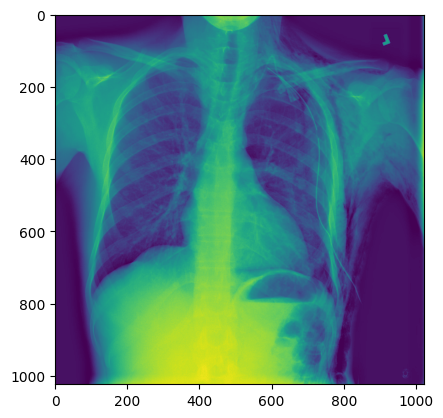

(1024, 1024)


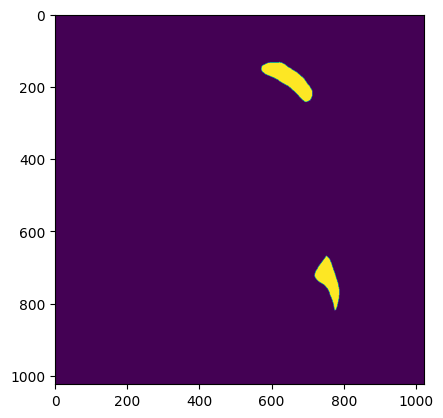

In [10]:
import cv2
path0='/content/drive/MyDrive/Pneumothorax_data/siim-acr-pneumothorax/png_images/1000_train_1_.png'
img0=cv2.imread(path0,cv2.IMREAD_GRAYSCALE)
shape0=img0.shape
print(shape0)
plt.imshow(img0)
plt.show()

path1='/content/drive/MyDrive/Pneumothorax_data/siim-acr-pneumothorax/png_masks/1000_train_1_.png'
img1=cv2.imread(path1,cv2.IMREAD_GRAYSCALE)
shape1=img1.shape
print(shape1)
plt.imshow(img1)
plt.show()

In [11]:
!pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [12]:
import os
import cv2
import pdb
import time
import warnings
import random
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader, Dataset, sampler
from matplotlib import pyplot as plt
import albumentations
from albumentations import (HorizontalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise)
from albumentations.pytorch import ToTensorV2
warnings.filterwarnings("ignore")

In [13]:
!pip install segmentation_models_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.6 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=cdcfee8cf2ed34683824ff1c7d69cc1cee67d7262adac9f3607eeb359330b4d7
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=aa9f7ce376d84ca94b6c755f4e844aaeace338745ead1bf3f141c31bfe111113
  Stored in directory: /root/.cache/pip/w

In [14]:
import segmentation_models_pytorch as smp

In [15]:
class SIIMDataset(Dataset):
    def __init__(self, df, fnames, data_folder, size, mean, std, phase):
        self.df = df
        self.root = data_folder
        self.size = size
        self.mean = mean
        self.std = std
        self.phase = phase
        self.transforms = get_transforms(phase, size, mean, std)
        self.gb = self.df.groupby('ImageId')
        self.fnames = fnames

    # def __getitem__(self, idx):
    #     image_id = self.fnames[idx]
    #     df = self.gb.get_group(image_id)
    #     annotations = df[' EncodedPixels'].tolist()
    #     image_path = os.path.join(self.root, image_id + ".png")
    #     image = cv2.imread(image_path)
    #     mask = np.zeros([1024, 1024])
    #     if annotations[0] != ' -1':
    #         for rle in annotations:
    #             mask += run_length_decode(rle)
    #     mask = (mask >= 1).astype('float32') # for overlap cases
    #     augmented = self.transforms(image=image, mask=mask)
    #     image = augmented['image']
    #     mask = augmented['mask']
    #     return image, mask

    def __len__(self):
        return len(self.fnames)

def get_transforms(phase, size, mean, std):
    list_transforms = []
    if phase == "train":
        list_transforms.extend(      # List.extend() appends elements to the end of the current list elements
            [
#                 HorizontalFlip(),
                ShiftScaleRotate(
                    shift_limit=0,   # no shifting
                    scale_limit=0.1, # scaling of image 
                    rotate_limit=10, # rotate
                    p=0.5,           # probability of applying the transform          
                    border_mode=cv2.BORDER_CONSTANT
                ),
#                 GaussNoise(),
            ]
        )
    list_transforms.extend(
        [
            Resize(size, size), # Resize the image with given dimensions as input
            Normalize(mean=mean, std=std, p=1),
            ToTensorV2(),
        ]
    )

    list_trfms = Compose(list_transforms) # Composes all the transforms together
    return list_trfms

def provider(
    fold,
    total_folds,
    data_folder,
    df_path,
    phase,
    size,
    mean=None,
    std=None,
    batch_size=8,
    num_workers=4,
):
    df_all = pd.read_csv(df_path)
    df = df_all.drop_duplicates('ImageId')
    df_with_mask = df[df[" EncodedPixels"] != " -1"]
    df_with_mask['has_mask'] = 1
    df_without_mask = df[df[" EncodedPixels"] == " -1"]
    df_without_mask['has_mask'] = 0
    df_without_mask_sampled = df_without_mask.sample(len(df_with_mask), random_state=69) # random state is imp
    df = pd.concat([df_with_mask, df_without_mask_sampled])
    
    #NOTE: equal number of positive and negative cases are chosen.
    
    kfold = StratifiedKFold(total_folds, shuffle=True, random_state=69)
    train_idx, val_idx = list(kfold.split(df["ImageId"], df["has_mask"]))[fold]
    train_df, val_df = df.iloc[train_idx], df.iloc[val_idx]
    df = train_df if phase == "train" else val_df
    # NOTE: total_folds=5 -> train/val : 80%/20%
    
    fnames = df['ImageId'].values
    
    image_dataset = SIIMDataset(df_all, fnames, data_folder, size, mean, std, phase)

    dataloader = DataLoader(
        image_dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=True,
        shuffle=True,
    )
    return dataloader